In [11]:
import numpy as np     #只需要下载numpy库即可
import GridWorld_v1

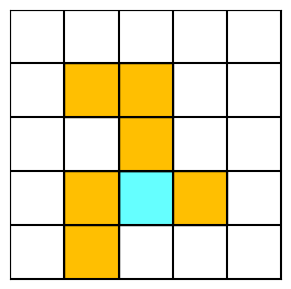

In [12]:
gamma = 0.9   #折扣因子，越接近0越近视
rows = 5      #记得行数和列数这里要同步改
columns = 5
# gridworld = GridWorld_v1.GridWorld_v1(rows=rows, columns=columns, forbiddenAreaNums=4, targetNums=2, seed = random.randint(1,1000))
# gridworld = GridWorld_v1.GridWorld_v1(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v1.GridWorld_v1(desc = ["##.T","...#","...."])  #随便弄的例子
desc = [".....",".##..","..#..",".#T#.",".#..."]
gridworld = GridWorld_v1.GridWorld_v1(forbidden_area_score=-10, score=1,desc = desc) 
gridworld.show()

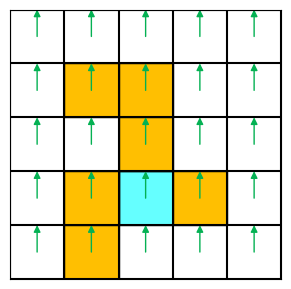

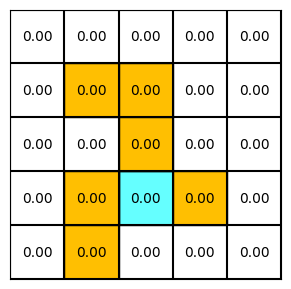

In [13]:
value = np.zeros(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
policy = np.argmax(qtable,axis=1).reshape(rows,columns)    #初始策略
gridworld.show_policy(policy)
gridworld.show_value(value)

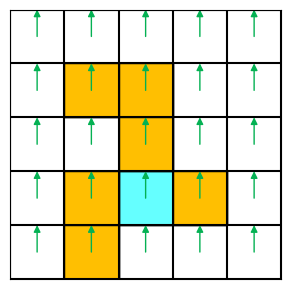

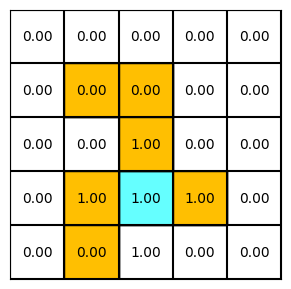

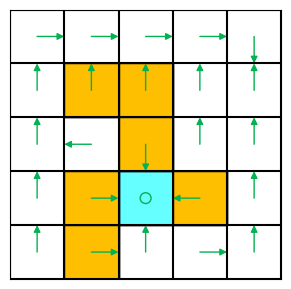

Euclidean Distance: 5.0
Euclidean Distance: 5.67
Euclidean Distance: 5.248800000000001
Euclidean Distance: 4.782969000000001
Euclidean Distance: 4.304672100000002
Euclidean Distance: 4.184141281200001
Euclidean Distance: 3.9540135107340006
Euclidean Distance: 3.660286792793762
Euclidean Distance: 3.150134321048129
Euclidean Distance: 2.7017034353459857


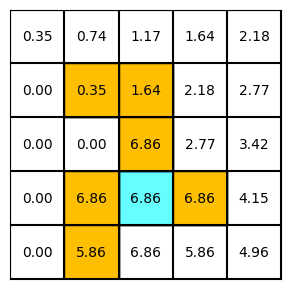

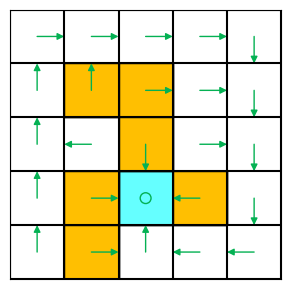

Euclidean Distance: 2.4315330918113887
Euclidean Distance: 2.0680188945855833
Euclidean Distance: 1.754861747691195
Euclidean Distance: 1.5506596534144024
Euclidean Distance: 1.3083690825684007
Euclidean Distance: 1.0597789568804075
Euclidean Distance: 0.8584209550731305
Euclidean Distance: 0.6953209736092333
Euclidean Distance: 0.5632099886234779
Euclidean Distance: 0.4562000907850179


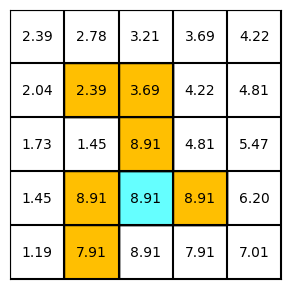

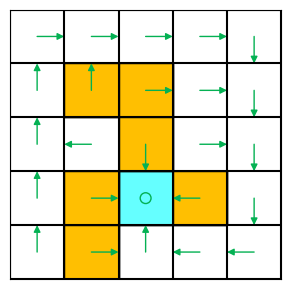

Euclidean Distance: 0.3695220735358652
Euclidean Distance: 0.2993128795640511
Euclidean Distance: 0.24244343244688132
Euclidean Distance: 0.19637918028197468
Euclidean Distance: 0.1590671360283985
Euclidean Distance: 0.12884438018300284
Euclidean Distance: 0.104363947948232
Euclidean Distance: 0.08453479783806828
Euclidean Distance: 0.06847318624883582
Euclidean Distance: 0.055463280861557024


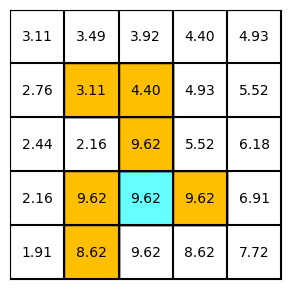

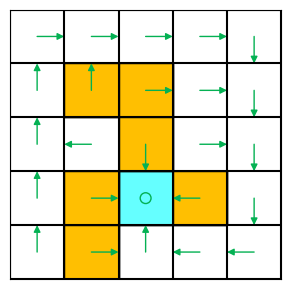

Euclidean Distance: 0.044925257497860284
Euclidean Distance: 0.03638945857326765
Euclidean Distance: 0.02947546144434684
Euclidean Distance: 0.02387512376992117
Euclidean Distance: 0.01933885025363554
Euclidean Distance: 0.015664468705444703
Euclidean Distance: 0.012688219651410261
Euclidean Distance: 0.010277457917642266
Euclidean Distance: 0.008324740913290381
Euclidean Distance: 0.0067430401397650785


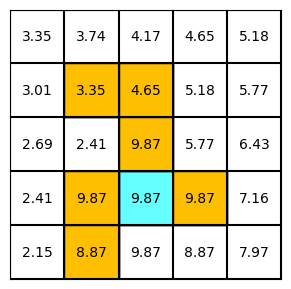

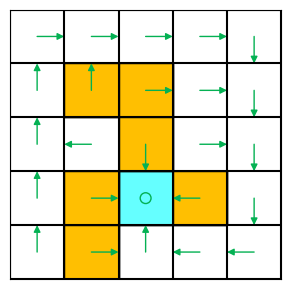

Euclidean Distance: 0.00546186251320991
Euclidean Distance: 0.004424108635700081
Euclidean Distance: 0.0035835279949169305
Euclidean Distance: 0.0029026576758826588
Euclidean Distance: 0.0023511527174650344
Euclidean Distance: 0.0019044337011467018
Euclidean Distance: 0.0015425912979287336
Euclidean Distance: 0.0012494989513224066
Euclidean Distance: 0.0010120941505710659
Euclidean Distance: 0.00081979626196263
Euclidean Distance: 0.00081979626196263


In [14]:
pre_value = value.copy()+1           #随便弄个不一样的初值

gridworld.show()                     #打印gridworld
gridworld.show_policy(policy)         #打印策略

for _ in range(100):                 #迭代次数，不需要也可以
#防止死循环，不需要也可以（因为可以证明必定收敛）
    pre_value = value.copy()      #保存副本，方便前后对比

    for nowx in range(rows):      #这里是为了找到当前状态Si的坐标
        for nowy in range(columns):
            for j in range(5): # 5个action
                score,nextState = gridworld.get_score((nowx,nowy),j)        #获取Si状态中，执行动作j后的（得分，下一个状态）
                qtable[nowx][nowy][j] = score + gamma * value[*nextState]  #开始迭代

    policy = np.argmax(qtable,axis=2) #这个就是策略了，但是value-iteration，
                                    #因为这里的策略是百分百选argmax的，别的概率是0，所以可以直接忽略策略的不确定性
    value = np.max(qtable,axis=2)     #更新value 向量
    if _%10==0:
        gridworld.show_value(value)       #打印value
        gridworld.show_policy(policy)
    print("Euclidean Distance:",np.sum((pre_value-value)**2))  #计算欧几里得距离

    if np.sum((pre_value-value)**2)<0.001:
        break
        
print("Euclidean Distance:",np.sum((pre_value-value)**2))  #计算欧几里得距离